In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
most_recent=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

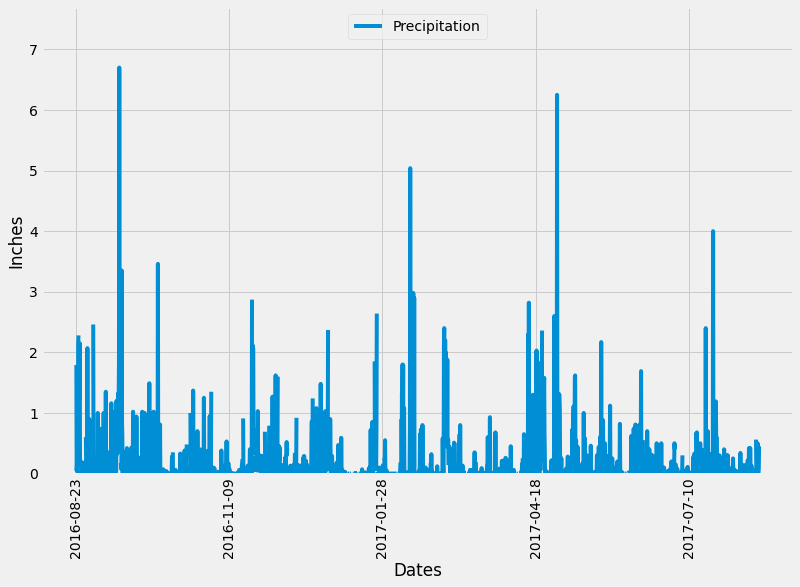

In [124]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
year_ago = latest_date- dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>= year_ago).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_precipitation = pd.DataFrame(results).rename(columns={'date':'Date', "prcp":'Precipitation'})

# Sort the dataframe by date
df_precipitation=df_precipitation.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
df_precipitation.plot(x='Date', y='Precipitation', figsize=(12,8), rot=90)
plt.ylim(0,7.7)
plt.ylabel('Inches')
plt.xlabel('Dates')
plt.legend(loc='upper center')

In [106]:
# Use Pandas to calculate the summary statistics for the precipitation data
averages = df_precipitaion.describe()
averages

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [107]:
# Design a query to calculate the total number of stations in the dataset
Station_Count=session.query(Station.station).count()
Station_Count

9

In [115]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_used = session.query(Measurement.station,func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
most_used

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [120]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)
       ]
station_stats=session.query(*sel).\
filter_by(station='USC00519281').all()
station_stats

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

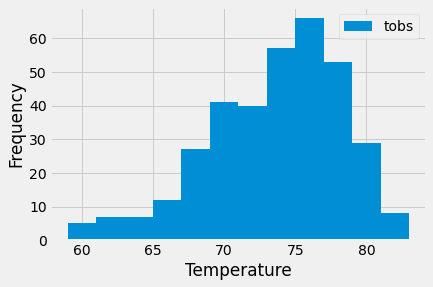

In [121]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months = session.query(Measurement.date, Measurement.tobs).filter_by(station = 'USC00519281').\
filter(Measurement.date >= year_ago).all()

df12months= pd.DataFrame(last_12_months)
df12months.plot(kind='hist', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [122]:
# Close Session
session.close()